<a href="https://colab.research.google.com/github/xc308/Python_Data_Analysis/blob/main/6_Simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## When real-world data is difficult to obtain

- the underlying processes by estimating parameters
- generateing samples from model that model scenarios under assumptions

## Case study:
- Goal: assessing the potential impact of new pricing strategy on customer purchasing
- Task: Develop simulations of random price discout within fixed ranges:
  - range : 0%- 10%
  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats




In [2]:
df = pd.read_csv("diamonds.csv")

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: ylabel='Count'>

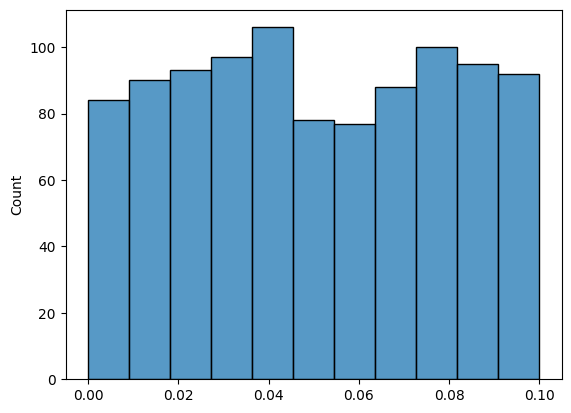

In [5]:
## Sampling discounts uniformly from 0% - 10%

n = 1000

samples = np.random.uniform(low = 0, high = 0.1, size = n)

x_bar = samples.mean()
std = samples.std()

sns.histplot(samples)


In [6]:
# CI interval

ci_interval = 0.95

SEM = std / np.sqrt(n) # std error of the sample mean

stats.norm.interval(ci_interval, loc = x_bar, scale = SEM) # CI interval

(np.float64(0.04863050463344514), np.float64(0.052205236027941575))

In [10]:
## now repeat this simulation 100 times,
# and see how many times estimated intervals contains true sample mean of a uniform distribution = 0.05


n = 1000 # sample size
ci_interval = 0.95

ci_contains_005 = 0
ci_not_contain_005 = 0


for _ in range(100):
    samples = np.random.uniform(low = 0, high = 0.1, size = n)
    x_bar = samples.mean()
    std = samples.std()

    SEM = std /np.sqrt(n)

    test_interval = stats.norm.interval(ci_interval, loc = x_bar, scale = SEM)

    if test_interval[0] <= 0.05 <= test_interval[1]:
      ci_contains_005 += 1

    else:
      ci_not_contain_005 += 1


print("number of interals contains 0.05:", ci_contains_005)
print("number of intervals does not contain 0.05:", ci_not_contain_005)



number of interals contains 0.05: 94
number of intervals does not contain 0.05: 6


##Simulation from Normal Distribution

In [11]:
n = 1000
ci_interval = 0.95

contain_mu = 0
not_contain_mu = 0


for _ in range(100):
  samples = np.random.normal(loc = 365, scale = 75, size = n)
  x_bar = samples.mean()
  std = samples.std()

  SEM = std / np.sqrt(n)

  test_interval = stats.norm.interval(ci_interval, loc = x_bar, scale = SEM)

  if test_interval[0] <= 365 <= test_interval[1]:
    contain_mu += 1
  else:
    not_contain_mu += 1


print("The number of times estimated interal contains true mu 365:", contain_mu)
print("The number of times estimated interval does not contain true mu 365:", not_contain_mu)


The number of times estimated interal contains true mu 365: 95
The number of times estimated interval does not contain true mu 365: 5
